In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv('sbg_indoor.csv')
df.head()

,MA,FA,Cs,Pb,Sn,Br,Cl,I,Bandgap,HOMO,LUMO,Light source,Illuminance (lux),PCE,Voc,Jsc(?A cm-2),FF
0,0.36,0.54,0.1,1,0,0.4,0.0,0.6,1.75,0.45,0.2,FL,1000,32.7,1.09,104.8,0.82
1,0.36,0.54,0.1,1,0,0.4,0.0,0.6,1.75,0.45,0.2,FL,500,28.9,1.01,53.7,0.81
2,0.36,0.54,0.1,1,0,0.4,0.0,0.6,1.75,0.45,0.2,FL,300,24.2,0.97,31.3,0.81
3,0.36,0.54,0.1,1,0,0.4,0.0,0.6,1.75,0.45,0.2,FL,200,22.3,0.91,19.3,0.75
4,0.36,0.54,0.1,1,0,0.4,0.0,0.6,1.75,0.45,0.2,FL,100,21.5,0.88,10.0,0.74


In [9]:
df.keys()

Index(['MA', 'FA', 'Cs', 'Pb', 'Sn', 'Br', 'Cl', 'I', 'Bandgap', 'HOMO',
       'LUMO', 'Light source', 'Illuminance (lux)', 'PCE', 'Voc',
       'Jsc(?A cm-2)', 'FF'],
      dtype='object')

In [10]:
df=df[['Bandgap', 'HOMO', 'LUMO','Light source', 'Illuminance (lux)', 'PCE',]]

In [11]:
df['Light source'].value_counts()

Light source
LED        273
FL          58
HALOGEN      7
Name: count, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['Light source']=le.fit_transform(df['Light source'])

In [13]:
df

,Bandgap,HOMO,LUMO,Light source,Illuminance (lux),PCE
0,1.75,0.45,0.20,0,1000,32.70
1,1.75,0.45,0.20,0,500,28.90
2,1.75,0.45,0.20,0,300,24.20
3,1.75,0.45,0.20,0,200,22.30
4,1.75,0.45,0.20,0,100,21.50
...,...,...,...,...,...,...
333,1.70,0.20,0.50,0,322,23.00
334,1.53,0.36,0.57,2,1000,17.80
335,1.80,0.50,0.80,2,200,25.21
336,1.80,0.50,0.80,2,500,26.69


In [14]:
df=df.dropna()

In [15]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import KFold
KFold

seed=4
kfold=KFold(10,shuffle=True,random_state=seed)
i=0
for tr, ts in kfold.split(df):
  train=df.iloc[tr]
  test=df.iloc[ts]
  tr_data_X=train.iloc[:,:-1]
  tr_data_Y=train.iloc[:,-1]
  ts_data_X=test.iloc[:,:-1]
  ts_data_Y=test.iloc[:,-1]
  if (i==2):

     np.savetxt('/content/drive/MyDrive/sbg_pce/generated pce/generated_train_2.csv',train,delimiter=",")
     np.savetxt('/content/drive/MyDrive/sbg_pce/generated pce/generated_test_2.csv',test, delimiter=",")

     print(ts)
  i=i+1

[ 20  39  46  99 100 103 106 124 128 169 172 178 182 188 193 200 212 232
 238 244 248 251 254 261 265 267 269 277 285 287 299 329 332 334]


In [ ]:
training_data_df=pd.read_csv('/content/drive/MyDrive/sbg_pce/generated pce/generated_train_2.csv',header=None)
training_data=training_data_df.to_numpy()
print(training_data)
print(training_data.shape)

[[1.750e+00 4.500e-01 2.000e-01 0.000e+00 1.000e+03 3.270e+01]
 [1.750e+00 4.500e-01 2.000e-01 0.000e+00 5.000e+02 2.890e+01]
 [1.750e+00 4.500e-01 2.000e-01 0.000e+00 3.000e+02 2.420e+01]
 ...
 [1.800e+00 5.000e-01 8.000e-01 2.000e+00 2.000e+02 2.521e+01]
 [1.800e+00 5.000e-01 8.000e-01 2.000e+00 5.000e+02 2.669e+01]
 [1.800e+00 5.000e-01 8.000e-01 2.000e+00 1.000e+03 3.073e+01]]
(304, 6)


In [ ]:
test_data_df=pd.read_csv("/content/drive/MyDrive/sbg_pce/generated pce/generated_test_2.csv",header=None)
test_data=test_data_df.to_numpy()
print(test_data)
print(test_data.shape)

[[ 1.750e+00  1.490e+00 -4.400e-01  2.000e+00  4.000e+02  2.886e+01]
 [ 1.800e+00  5.000e-01  5.000e-01  2.000e+00  1.000e+03  2.308e+01]
 [ 1.300e+00  5.000e-01  2.000e-01  2.000e+00  1.000e+03  1.045e+01]
 [ 1.530e+00  2.000e-01 -1.300e-01  2.000e+00  1.000e+03  3.590e+01]
 [ 1.530e+00  2.000e-01 -4.100e-01  2.000e+00  1.000e+03  3.480e+01]
 [ 1.530e+00  2.000e-01  4.300e-01  2.000e+00  2.000e+02  1.740e+01]
 [ 1.900e+00  2.400e-01  9.600e-01  2.000e+00  5.000e+02  2.669e+01]
 [ 1.720e+00  5.000e-01  4.100e-01  2.000e+00  1.000e+03  3.900e+00]
 [ 1.620e+00  6.400e-01  2.800e-01  2.000e+00  1.000e+03  2.574e+01]
 [ 1.780e+00  6.100e-01  3.700e-01  2.000e+00  2.000e+03  2.222e+01]
 [ 1.590e+00  5.000e-01  2.900e-01  2.000e+00  6.000e+02  2.278e+01]
 [ 1.660e+00  5.300e-01  3.300e-01  2.000e+00  6.000e+02  2.467e+01]
 [ 1.200e+00  4.500e-01  2.500e-01  2.000e+00  1.000e+02  1.860e+01]
 [ 1.200e+00  4.500e-01  5.000e-01  2.000e+00  1.000e+02  5.800e+00]
 [ 1.200e+00  4.500e-01  5.000e-01

In [ ]:
ts_data_X=test_data[:,:-1]
ts_data_Y=test_data[:,-1]
print(ts_data_Y.shape)

(34,)


In [ ]:
import time
st = time.time()
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit( tr_data_X,  tr_data_Y)

LinearRegression()

In [ ]:
y_pred_lr =lr.predict(ts_data_X)
et = time.time()
elapsed_time = et - st
print('LR:', elapsed_time, 'seconds')

y_pred_lr.shape

LR: 0.021777629852294922 seconds


(34,)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
score_lr=r2_score(ts_data_Y, y_pred_lr)
mse_lr=mean_squared_error(ts_data_Y, y_pred_lr)
import scipy
r_lr=scipy.stats.pearsonr(ts_data_Y,y_pred_lr)

In [ ]:
print('R2_LR=',score_lr)
print('mse_LR=',mse_lr)
print('R score_LR=',r_lr[0])

R2_LR= 0.2216936757068303
mse_LR= 59.66194358425846
R score_LR= 0.48192765085617223


In [ ]:
import time
st = time.time()
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(tr_data_X, tr_data_Y)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred_dtr =regressor.predict(ts_data_X)
et = time.time()
elapsed_time = et - st
print('DTR:', elapsed_time, 'seconds')
y_pred_dtr

DTR: 0.020736217498779297 seconds


array([28.86      , 23.08      , 10.45      , 35.9       , 34.8       ,
       16.69285714, 26.69      ,  3.9       , 25.74      , 22.22      ,
       22.78      , 24.67      , 18.6       ,  5.8       , 10.2       ,
       10.8       ,  5.85      , 17.5       , 24.        , 32.82      ,
       23.33      , 25.74      , 10.45      , 25.56      , 25.85      ,
       26.3       , 33.88      , 34.59      , 25.56      , 19.05      ,
        5.8       , 19.9       , 20.3       , 17.8       ])

In [ ]:
ts_data_Y

array([28.86, 23.08, 10.45, 35.9 , 34.8 , 17.4 , 26.69,  3.9 , 25.74,
       22.22, 22.78, 24.67, 18.6 ,  5.8 , 12.9 , 10.8 ,  5.85, 17.5 ,
       24.  , 32.82, 23.33, 25.74, 10.45, 25.56, 27.  , 26.3 , 33.88,
       34.59, 25.56, 19.05,  5.8 , 19.9 , 20.3 , 17.8 ])

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error,fowlkes_mallows_score,mean_squared_log_error
score_dtr=r2_score(ts_data_Y, y_pred_dtr)
mse_dtr=mean_squared_error(ts_data_Y, y_pred_dtr)
mape_dtr=mean_absolute_percentage_error(ts_data_Y, y_pred_dtr)
mallow_dtr=fowlkes_mallows_score(ts_data_Y, y_pred_dtr)
mslr_dtr=mean_squared_log_error(ts_data_Y, y_pred_dtr)
import scipy
r_dtr=scipy.stats.pearsonr(ts_data_Y,y_pred_dtr)

In [ ]:
print('R2_dtr=',score_dtr)
print('mse_dtr=',mse_dtr)
print('R score_dtr=',r_dtr[0])
print('MAPE_dtr=',mape_dtr)
print('mallow_dtr=',mallow_dtr)
print('mslr_dtr',mslr_dtr)

R2_dtr= 0.9965036554965081
mse_dtr= 0.268016206482593
R score_dtr= 0.9984198201453158
MAPE_dtr= 0.008603979772431113
mallow_dtr= 1.0
mslr_dtr 0.0014688208900525569


In [ ]:
import matplotlib.font_manager as font_manager

# List all the available font names on your system
font_names = [f.name for f in font_manager.fontManager.ttflist]
print(font_names)


['STIXGeneral', 'DejaVu Serif', 'DejaVu Sans Display', 'STIXNonUnicode', 'cmsy10', 'DejaVu Serif', 'DejaVu Serif Display', 'cmex10', 'STIXGeneral', 'cmmi10', 'STIXSizeTwoSym', 'cmtt10', 'DejaVu Sans Mono', 'cmss10', 'STIXSizeTwoSym', 'STIXNonUnicode', 'STIXSizeFiveSym', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'STIXSizeFourSym', 'STIXSizeFourSym', 'STIXSizeThreeSym', 'DejaVu Serif', 'STIXGeneral', 'STIXSizeOneSym', 'cmb10', 'STIXNonUnicode', 'DejaVu Sans Mono', 'STIXSizeOneSym', 'DejaVu Sans', 'DejaVu Serif', 'DejaVu Sans', 'STIXSizeThreeSym', 'cmr10', 'STIXGeneral', 'STIXNonUnicode', 'Liberation Sans', 'Liberation Mono', 'Liberation Serif', 'Humor Sans', 'Liberation Sans', 'Liberation Sans Narrow', 'Liberation Sans Narrow', 'Liberation Sans', 'Liberation Serif', 'Liberation Mono', 'Liberation Sans Narrow', 'Liberation Sans', 'Liberation Mono', 'Liberation Serif', 'Liberation Serif', 'Liberation Mono', 'Liberation Sans Narrow']


Text(0.5, 1.0, 'Decisiontree regressor plot')

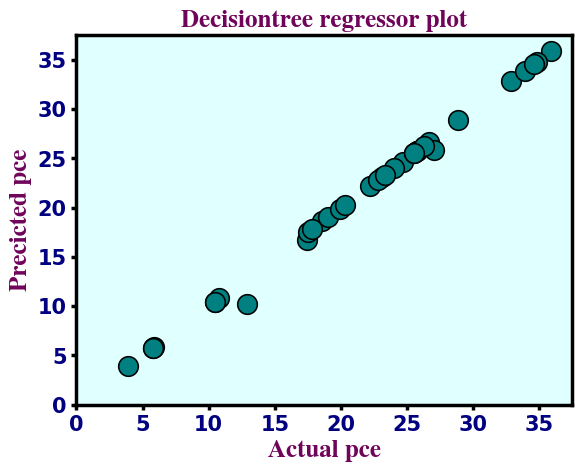

In [ ]:
import warnings
warnings.filterwarnings('ignore')
sns.scatterplot(x=ts_data_Y,y=y_pred_dtr,c='#008080',edgecolor='black',s=200)
font1={'family':'STIXGeneral','color':'#6f045a','fontweight':'bold','size':18}
plt.yticks(np.arange(0,40,5),color='navy',fontweight='bold',size=15)
plt.xticks(np.arange(0,40,5),color='navy',fontweight='bold',size=15)
plt.xlabel('Actual pce',fontdict=font1)
plt.ylabel('Precicted pce',fontdict=font1)
plt.title('Decisiontree regressor plot',c='#6f045a',fontdict=font1)

In [ ]:
reg=np.polyfit(ts_data_Y,y_pred_dtr,deg=1)
reg

array([ 1.0070301 , -0.28291037])

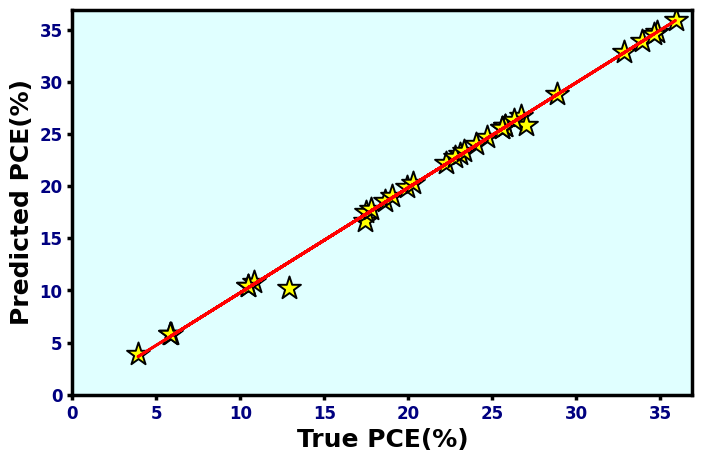

In [ ]:
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Ignore warnings
warnings.filterwarnings('ignore')

# Assuming you have defined 'ts_data_Y' and 'y_pred_dtr' before this code snippet

# Perform linear regression and obtain the coefficients
reg = np.polyfit(ts_data_Y, y_pred_dtr, deg=1)
slope = reg[0]
intercept = reg[1]

# Generate the trend line for linear regression
trend = slope * ts_data_Y + intercept

# Set the style to a light blue or cyan background color
plt.figure(figsize=(8, 5))
sns.set_style({'axes.facecolor': '#E0FFFF'})  # Set your desired color here

# Plot the scatter plot with the specified background color
sns.scatterplot(x=ts_data_Y, y=y_pred_dtr, c='yellow', marker='*', edgecolor='black', s=300)
mpl.rcParams['axes.linewidth'] = 2.5
mpl.rcParams['xtick.major.width'] = 2.5  # Set your desired x-axis tick thickness here
mpl.rcParams['ytick.major.width'] = 2.5
# Plot the trend line
plt.plot(ts_data_Y, trend, color='red', linewidth=2)

# Customize the plot (xticks, yticks, labels, title, etc.)
font1 = {'family': 'calibari', 'color': 'black', 'fontweight': 'bold', 'size': 18}
plt.yticks(color='navy', fontweight='bold', size=12)
plt.xlim(0, max(ts_data_Y) + 1)
plt.ylim(0, max(y_pred_dtr) + 1)
plt.xticks(color='navy', fontweight='bold', size=12)
plt.xlabel('True PCE(%)', fontdict=font1)
plt.ylabel('Predicted PCE(%)', fontdict=font1)
# plt.title('Decisiontree regressor Plot', c='#6f045a', fontdict=font1)

# Show the plot
plt.show()


In [ ]:
reg

array([ 1.0070301 , -0.28291037])

In [ ]:
import time
st = time.time()
import xgboost as xgb
reg = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=4
)

In [ ]:
reg.fit(tr_data_X, tr_data_Y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_pred_xgb =reg.predict(ts_data_X)
et = time.time()
elapsed_time = et - st
print('XGB:', elapsed_time, 'seconds')

XGB: 0.07247471809387207 seconds


In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error,fowlkes_mallows_score,mean_squared_log_error
R2_xgb =r2_score(ts_data_Y, y_pred_xgb)
mse_xgb= mean_squared_error(ts_data_Y, y_pred_xgb)
mape_xgb=mean_absolute_percentage_error(ts_data_Y, y_pred_xgb)
mallow_xgb=fowlkes_mallows_score(ts_data_Y, y_pred_xgb)
mslr_xgb=mean_squared_log_error(ts_data_Y, y_pred_xgb)
import scipy
r_xgb=scipy.stats.pearsonr(ts_data_Y,y_pred_xgb)

In [ ]:
print('R2_xgb=',R2_xgb)
print('mse_xgb=',mse_xgb)
print('R score_xgb=',r_xgb[0])
print('mape_xgb=',mape_xgb)
print('mallow_xgb=',mallow_xgb)
print('mslr_xgb',mslr_xgb)

R2_xgb= 0.991871490620313
mse_xgb= 0.6230999966182038
R score_xgb= 0.9962695273293322
mape_xgb= 0.042166819882202916
mallow_xgb= 0.7071067811865476
mslr_xgb 0.0036303732495436554


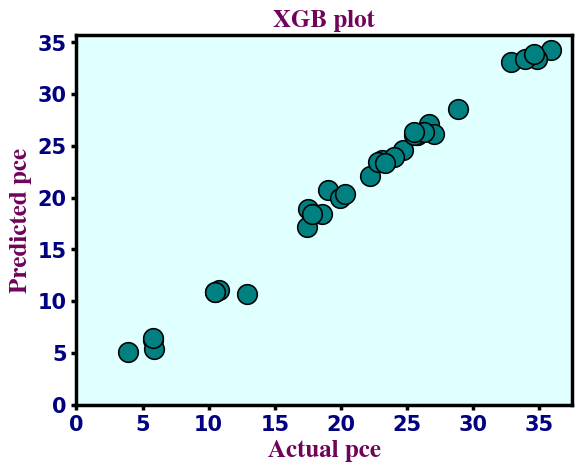

In [ ]:
import warnings
# Ignore the 'matplotlib.font_manager' warning
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib.font_manager')
# Your code for the scatter plot and other configurations
sns.scatterplot(x=ts_data_Y, y=y_pred_xgb, c='#008080', edgecolor='black', s=200)
font1 = {'family': 'STIXGeneral', 'color': '#6f045a', 'fontweight': 'bold', 'size': 18}
plt.yticks(np.arange(0, 40, 5), color='navy', fontweight='bold', size=15)
plt.xticks(np.arange(0, 40, 5), color='navy', fontweight='bold', size=15)
plt.xlabel('Actual pce', fontdict=font1)
plt.ylabel('Predicted pce', fontdict=font1)
plt.title('XGB plot', c='#6f045a', fontdict=font1)

# Show the plot
plt.show()


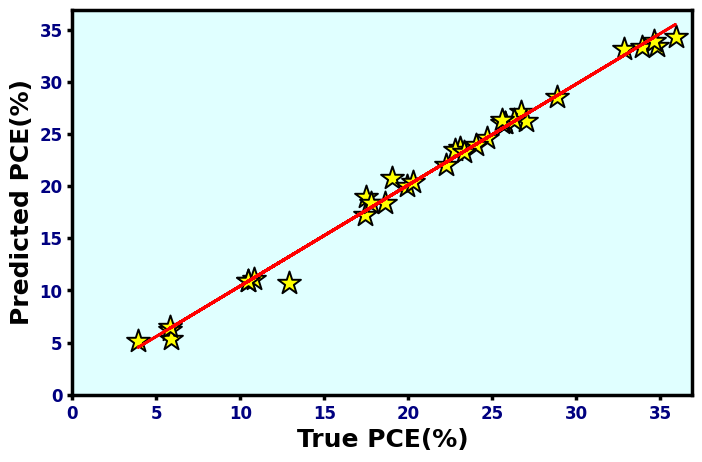

In [ ]:
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
# Ignore warnings
warnings.filterwarnings('ignore')

# Assuming you have defined 'ts_data_Y' and 'y_pred_dtr' before this code snippet

# Perform linear regression and obtain the coefficients
reg = np.polyfit(ts_data_Y, y_pred_xgb, deg=1)
slope = reg[0]
intercept = reg[1]

# Generate the trend line for linear regression
trend = slope * ts_data_Y + intercept

# Set the style to a light blue or cyan background color
plt.figure(figsize=(8, 5))
sns.set_style({'axes.facecolor': '#E0FFFF'})  # Set your desired color here
mpl.rcParams['axes.linewidth'] = 2.5
mpl.rcParams['xtick.major.width'] = 2.5  # Set your desired x-axis tick thickness here
mpl.rcParams['ytick.major.width'] = 2.5
# Plot the scatter plot with the specified background color
sns.scatterplot(x=ts_data_Y, y=y_pred_xgb, c='yellow', marker='*', edgecolor='black', s=300)

# Plot the trend line
plt.plot(ts_data_Y, trend, color='red', linewidth=2)

# Customize the plot (xticks, yticks, labels, title, etc.)
font1 = {'family': 'calibari', 'color': 'black', 'fontweight': 'bold', 'size': 18}
plt.yticks(color='navy', fontweight='bold', size=12)
plt.xlim(0, max(ts_data_Y) + 1)
plt.ylim(0, max(y_pred_dtr) + 1)
plt.xticks(color='navy', fontweight='bold', size=12)
plt.xlabel('True PCE(%)', fontdict=font1)
plt.ylabel('Predicted PCE(%)', fontdict=font1)
# plt.title('Xgboost regressor Plot', c='#6f045a', fontdict=font1)

# Show the plot
plt.show()


In [ ]:
reg

array([0.96789565, 0.75256899])

In [ ]:
import time
st = time.time()
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(tr_data_X,  tr_data_Y)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
y_pred_knn = knn.predict(ts_data_X)
et = time.time()
elapsed_time = et - st
print('KNN:', elapsed_time, 'seconds')

KNN: 0.02170705795288086 seconds


In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error,fowlkes_mallows_score,mean_squared_log_error
R2_knn =r2_score(ts_data_Y, y_pred_knn)
mse_knn= mean_squared_error(ts_data_Y, y_pred_knn)
mape_knn=mean_absolute_percentage_error(ts_data_Y, y_pred_knn)
mallow_knn=fowlkes_mallows_score(ts_data_Y, y_pred_knn)
mslr_knn=mean_squared_log_error(ts_data_Y, y_pred_knn)
import scipy
r_knn=scipy.stats.pearsonr(ts_data_Y,y_pred_knn)

In [ ]:
print('R2_knn=',R2_knn)
print('mse_knn=',mse_knn)
print('R score_knn=',r_knn[0])
print('mape_knn=',mape_knn)
print('mallow_knn=',mallow_knn)
print('mslr_knn=',mslr_knn)

R2_knn= 0.6868722681186614
mse_knn= 24.003157228790855
R score_knn= 0.8351825120028713
mape_knn= 0.3086179116508423
mallow_knn= 0.3535533905932738
mslr_knn= 0.11958699581787649


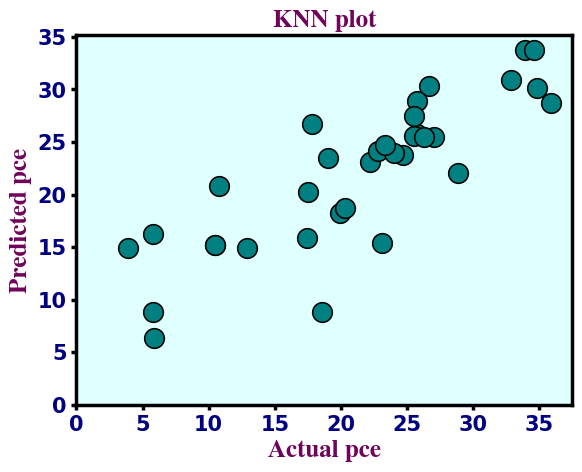

In [ ]:
import warnings
# Ignore the 'matplotlib.font_manager' warning
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib.font_manager')
# Your code for the scatter plot and other configurations
sns.scatterplot(x=ts_data_Y, y=y_pred_knn, c='#008080', edgecolor='black', s=200)
font1 = {'family': 'STIXGeneral', 'color': '#6f045a', 'fontweight': 'bold', 'size': 18}
plt.yticks(np.arange(0, 40, 5), color='navy', fontweight='bold', size=15)
plt.xticks(np.arange(0, 40, 5), color='navy', fontweight='bold', size=15)
plt.xlabel('Actual pce', fontdict=font1)
plt.ylabel('Predicted pce', fontdict=font1)
plt.title('KNN plot', c='#6f045a', fontdict=font1)

# Show the plot
plt.show()


In [ ]:
import time
st = time.time()
from sklearn.svm import SVR
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(tr_data_X, tr_data_Y)
y_pred_svr = regressor.predict(ts_data_X)
et = time.time()
elapsed_time = et - st
print('SVR:', elapsed_time, 'seconds')

SVR: 0.014557123184204102 seconds


In [ ]:
y_pred_svr.shape

(34,)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
R2_svr =r2_score(ts_data_Y, y_pred_svr)
mse_svr= mean_squared_error(ts_data_Y, y_pred_svr)
import scipy
r_svr=scipy.stats.pearsonr(ts_data_Y,y_pred_svr)

In [ ]:
print('R2_svr=',R2_svr)
print('mse_svr=',mse_svr)
print('R score_svr=',r_svr[0])

R2_svr= -0.06686973460097434
mse_svr= 81.78209521209043
R score_svr= 0.3204386572790435


In [ ]:
import time
st = time.time()
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = None)
regressor.fit(tr_data_X, tr_data_Y)
y_pred_rf = regressor.predict(ts_data_X)
et = time.time()
elapsed_time = et - st
print('RF:', elapsed_time, 'seconds')

RF: 0.1904923915863037 seconds


In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error,fowlkes_mallows_score,mean_squared_log_error
R2_rf =r2_score(ts_data_Y, y_pred_rf)
mse_rf= mean_squared_error(ts_data_Y, y_pred_rf)
mape_rf=mean_absolute_percentage_error(ts_data_Y, y_pred_rf)
mallow_rf=fowlkes_mallows_score(ts_data_Y, y_pred_rf)
mslr_rf=mean_squared_log_error(ts_data_Y, y_pred_rf)
import scipy
r_rf=scipy.stats.pearsonr(ts_data_Y,y_pred_rf)

In [ ]:
print('R2_rf=',R2_rf)
print('mse_rf=',mse_rf)
print('R score_rf=',r_rf[0])
print('mape_rf=',mape_rf)
print('mallow_rf=',mallow_rf)
print('mslr_rf=',mslr_rf)

R2_rf= 0.9408906863179526
mse_rf= 4.531090687725376
R score_rf= 0.9791415419799454
mape_rf= 0.14032306606625045
mallow_rf= 0.5
mslr_rf= 0.03979763409445289


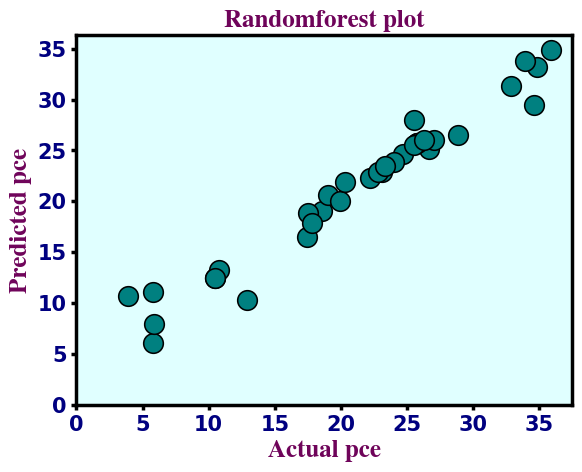

In [ ]:
import warnings
# Ignore the 'matplotlib.font_manager' warning
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib.font_manager')
# Your code for the scatter plot and other configurations
sns.scatterplot(x=ts_data_Y, y=y_pred_rf, c='#008080', edgecolor='black', s=200)
font1 = {'family': 'STIXGeneral', 'color': '#6f045a', 'fontweight': 'bold', 'size': 18}
plt.yticks(np.arange(0, 40, 5), color='navy', fontweight='bold', size=15)
plt.xticks(np.arange(0, 40, 5), color='navy', fontweight='bold', size=15)
plt.xlabel('Actual pce', fontdict=font1)
plt.ylabel('Predicted pce', fontdict=font1)
plt.title('Randomforest plot', c='#6f045a', fontdict=font1)

# Show the plot
plt.show()


In [ ]:
import time
st = time.time()
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

In [ ]:
ada_reg = AdaBoostRegressor(random_state=0, n_estimators=300)
ada_reg.fit(tr_data_X,tr_data_Y)

AdaBoostRegressor(n_estimators=300, random_state=0)

In [ ]:
AdaBoostRegressor(n_estimators=100, random_state=0)
y_pred_AdB = np.array(ada_reg.predict(ts_data_X))
et = time.time()
elapsed_time = et - st
print('ADB :', elapsed_time, 'seconds')

ADB : 3.4564568996429443 seconds


In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error,fowlkes_mallows_score,mean_squared_log_error
R2_AdB =r2_score(ts_data_Y, y_pred_AdB)
mse_AdB= mean_squared_error(ts_data_Y, y_pred_AdB)
mape_AdB=mean_absolute_percentage_error(ts_data_Y, y_pred_AdB)
mallow_AdB=fowlkes_mallows_score(ts_data_Y, y_pred_AdB)
mslr_AdB=mean_squared_log_error(ts_data_Y, y_pred_AdB)
import scipy
r_rf=scipy.stats.pearsonr(ts_data_Y,y_pred_rf)

In [ ]:
print('R2_AdB=',R2_AdB)
print('mse_AdB=',mse_AdB)
print('R score_AdB=',r_AdB[0])
print('mape_AdB=',mape_AdB)
print('mallow_AdB=',mallow_AdB)
print('mslr_AdB=',mslr_AdB)

R2_AdB= 0.6212603132576748
mse_AdB= 29.03271516399604
R score_AdB= 0.8120328894868366
mape_AdB= 0.36722138835655227
mallow_AdB= 0.2581988897471611
mslr_AdB= 0.13015242637308366


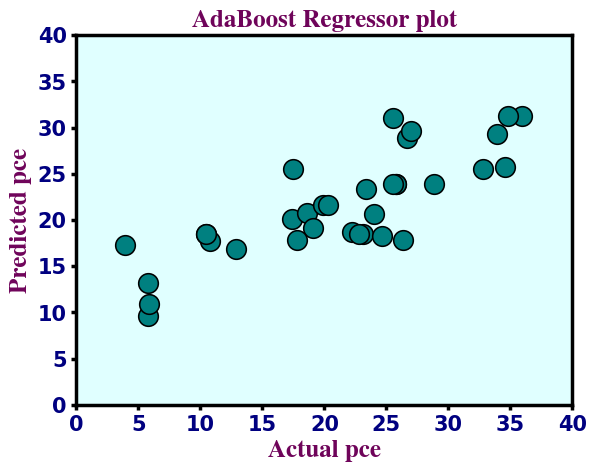

In [ ]:
import warnings
# Ignore the 'matplotlib.font_manager' warning
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib.font_manager')
# Your code for the scatter plot and other configurations
sns.scatterplot(x=ts_data_Y, y=y_pred_AdB, c='#008080', edgecolor='black', s=200)
font1 = {'family': 'STIXGeneral', 'color': '#6f045a', 'fontweight': 'bold', 'size': 18}
plt.yticks(np.arange(0, 45, 5), color='navy', fontweight='bold', size=15)
plt.xticks(np.arange(0, 45, 5), color='navy', fontweight='bold', size=15)
plt.xlabel('Actual pce', fontdict=font1)
plt.ylabel('Predicted pce', fontdict=font1)
plt.title('AdaBoost Regressor plot', c='#6f045a', fontdict=font1)

# Show the plot
plt.show()


In [ ]:
import time
st = time.time()
from sklearn.datasets import make_regression
from lightgbm import LGBMRegressor
model_LGBM = LGBMRegressor()

In [ ]:
model_LGBM.fit(tr_data_X,tr_data_Y)

LGBMRegressor()

In [ ]:
y_pred_LightGBM = np.array(model_LGBM.predict(ts_data_X))
et = time.time()
elapsed_time = et - st
print('LGBM:', elapsed_time, 'seconds')

LGBM: 0.051859378814697266 seconds


In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error,fowlkes_mallows_score,mean_squared_log_error
R2_LightGBM =r2_score(ts_data_Y, y_pred_LightGBM)
mse_LightGBM= mean_squared_error(ts_data_Y, y_pred_LightGBM)
mape_LightGBM=mean_absolute_percentage_error(ts_data_Y, y_pred_LightGBM)
mallow_LightGBM=fowlkes_mallows_score(ts_data_Y, y_pred_LightGBM)
mslr_LightGBM=mean_squared_log_error(ts_data_Y, y_pred_LightGBM)
import scipy
r_LightGBM=scipy.stats.pearsonr(ts_data_Y,y_pred_LightGBM)

In [ ]:
print('R2_LightGBM=',R2_LightGBM)
print('mse_LightGBM=',mse_LightGBM)
print('R score_LightGBM=',r_LightGBM)
print('mape_LightGBM=',mape_LightGBM)
print('mallow_LightGBM=',mallow_LightGBM)
print('mslr_LightGBM=',mslr_LightGBM)

R2_LightGBM= 0.7694330323497668
mse_LightGBM= 17.674369315750504
R score_LightGBM= PearsonRResult(statistic=0.8919450965125001, pvalue=1.449627597648955e-12)
mape_LightGBM= 0.24407861799752262
mallow_LightGBM= 0.5
mslr_LightGBM= 0.07502471035084028


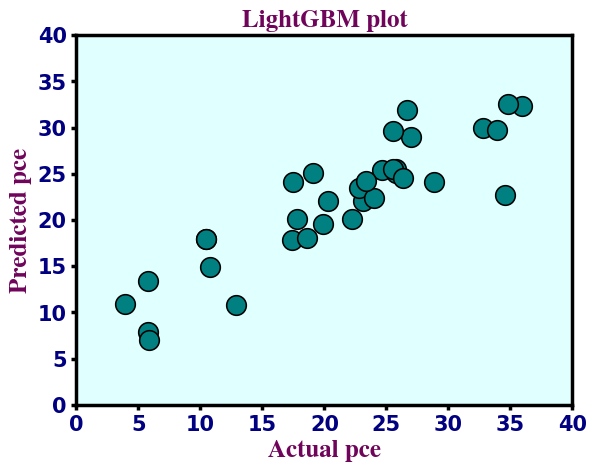

In [ ]:
import warnings
# Ignore the 'matplotlib.font_manager' warning
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib.font_manager')
# Your code for the scatter plot and other configurations
sns.scatterplot(x=ts_data_Y, y=y_pred_LightGBM, c='#008080', edgecolor='black', s=200)
font1 = {'family': 'STIXGeneral', 'color': '#6f045a', 'fontweight': 'bold', 'size': 18}
plt.yticks(np.arange(0, 45, 5), color='navy', fontweight='bold', size=15)
plt.xticks(np.arange(0, 45, 5), color='navy', fontweight='bold', size=15)
plt.xlabel('Actual pce', fontdict=font1)
plt.ylabel('Predicted pce', fontdict=font1)
plt.title('LightGBM plot', c='#6f045a', fontdict=font1)

# Show the plot
plt.show()


In [ ]:
pip install CatBoost

In [ ]:
import time
st = time.time()
from catboost import CatBoostRegressor
model=CatBoostRegressor(iterations=18, depth=4, learning_rate=0.1, loss_function='RMSE')
model.fit(tr_data_X,tr_data_Y, eval_set=(ts_data_X,ts_data_Y),plot=True)
y_pred_CatBoost = np.array(model.predict(ts_data_X))
et = time.time()
elapsed_time = et - st
print('catboost:', elapsed_time, 'seconds')

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 7.8456870	test: 8.7920649	best: 8.7920649 (0)	total: 397us	remaining: 6.76ms
1:	learn: 7.7112692	test: 8.6357698	best: 8.6357698 (1)	total: 1.2ms	remaining: 9.57ms
2:	learn: 7.5253691	test: 8.4182048	best: 8.4182048 (2)	total: 1.44ms	remaining: 7.21ms
3:	learn: 7.3607810	test: 8.2325807	best: 8.2325807 (3)	total: 2.2ms	remaining: 7.69ms
4:	learn: 7.1887788	test: 8.0144985	best: 8.0144985 (4)	total: 2.44ms	remaining: 6.35ms
5:	learn: 7.0661357	test: 7.8661667	best: 7.8661667 (5)	total: 2.67ms	remaining: 5.33ms
6:	learn: 6.9786937	test: 7.6822618	best: 7.6822618 (6)	total: 2.88ms	remaining: 4.53ms
7:	learn: 6.9008346	test: 7.5568826	best: 7.5568826 (7)	total: 3.09ms	remaining: 3.86ms
8:	learn: 6.8093119	test: 7.4743890	best: 7.4743890 (8)	total: 3.38ms	remaining: 3.38ms
9:	learn: 6.7210456	test: 7.3190131	best: 7.3190131 (9)	total: 3.62ms	remaining: 2.9ms
10:	learn: 6.6208361	test: 7.2138400	best: 7.2138400 (10)	total: 4.39ms	remaining: 2.8ms
11:	learn: 6.5326610	test: 7.141639

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
R2_CatBoost =r2_score(ts_data_Y, y_pred_CatBoost)
mse_CatBoost= mean_squared_error(ts_data_Y,y_pred_CatBoost)
import scipy
r_CatBoost=scipy.stats.pearsonr(ts_data_Y,y_pred_CatBoost)

In [ ]:
print('R2_CatBoost=',R2_CatBoost)
print('mse_CatBoost=',mse_CatBoost)
print('R score_CatBoost=',r_CatBoost[0])

R2_CatBoost= 0.4507523804798893
mse_CatBoost= 42.10319184976032
R score_CatBoost= 0.7941828705410403


In [ ]:
import time
st = time.time()
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
np.random.seed(seed=8)
model = Sequential()
model.add(Dense(units=20, input_dim=5, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(tr_data_X, tr_data_Y ,batch_size = 8, epochs = 100,verbose=0)
pred=model.predict(ts_data_X)
pred_ANN=[]
for i in pred:
  pred_ANN.append(i[0])
pred_ANN=np.array(pred_ANN)
rms = mean_squared_error(pred_ANN, ts_data_Y, squared=False)
print(rms)
et = time.time()
elapsed_time = et - st
print('ANN time:', elapsed_time, 'seconds')

2/2 [==============================] - 0s 4ms/step
8.179843862930294
ANN time: 7.876587629318237 seconds


In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
R2_ANN =r2_score(ts_data_Y, pred_ANN)
mse_ANN= mean_squared_error(ts_data_Y,pred_ANN)
import scipy
r_ANN=scipy.stats.pearsonr(ts_data_Y,pred_ANN)

In [ ]:
print('R2_ANN=',R2_ANN)
print('mse_ANN=',mse_ANN)
print('R score_ANN=',r_ANN[0])

R2_ANN= 0.12714281707110076
mse_ANN= 66.90984562191841
R score_ANN= 0.4364070672872936


In [ ]:
print('R2_LR=',score_lr)
print('mse_LR=',mse_lr)
print('R score_LR=',r_lr[0])
print('-----------------------------------------')
print('R2_dtr=',score_dtr)
print('mse_dtr=',mse_dtr)
print('R score_dtr=',r_dtr[0])
print('-----------------------------------------')
print('R2_xgb=',R2_xgb)
print('mse_xgb=',mse_xgb)
print('R score_xgb=',r_xgb[0])
print('-----------------------------------------')
print('R2_knn=',R2_knn)
print('mse_knn=',mse_knn)
print('R score_knn=',r_knn[0])
print('-----------------------------------------')
print('R2_svr=',R2_svr)
print('mse_svr=',mse_svr)
print('R score_svr=',r_svr[0])
print('-----------------------------------------')
print('R2_rf=',R2_rf)
print('mse_rf=',mse_rf)
print('R score_rf=',r_rf[0])
print('-----------------------------------------')
print('R2_AdB=',R2_AdB)
print('mse_AdB=',mse_AdB)
print('R score_AdB=',r_AdB[0])
print('-----------------------------------------')
print('R2_LightGBM=',R2_LightGBM)
print('mse_LightGBM=',mse_LightGBM)
print('R score_LightGBM=',r_LightGBM[0])
print('-----------------------------------------')
print('R2_CatBoost=',R2_CatBoost)
print('mse_CatBoost=',mse_CatBoost)
print('R score_CatBoost=',r_CatBoost[0])
print('-----------------------------------------')
print('R2_ANN=',R2_ANN)
print('mse_ANN=',mse_ANN)
print('R score_ANN=',r_ANN[0])

R2_LR= 0.2216936757068303
mse_LR= 59.66194358425846
R score_LR= 0.48192765085617223
-----------------------------------------
R2_dtr= 0.9965036554965081
mse_dtr= 0.268016206482593
R score_dtr= 0.9984198201453158
-----------------------------------------
R2_xgb= 0.991871490620313
mse_xgb= 0.6230999966182038
R score_xgb= 0.9962695273293322
-----------------------------------------
R2_knn= 0.6868722681186614
mse_knn= 24.003157228790855
R score_knn= 0.8351825120028713
-----------------------------------------
R2_svr= -0.06686973460097434
mse_svr= 81.78209521209043
R score_svr= 0.3204386572790435
-----------------------------------------
R2_rf= 0.9408906863179526
mse_rf= 4.531090687725376
R score_rf= 0.9791415419799454
-----------------------------------------
R2_AdB= 0.6212603132576748
mse_AdB= 29.03271516399604
R score_AdB= 0.8120328894868366
-----------------------------------------
R2_LightGBM= 0.7694330323497668
mse_LightGBM= 17.674369315750504
R score_LightGBM= 0.8919450965125001
----